In [892]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [893]:
data = pd.read_csv('./Clustering_test1', sep=' ', names=['X','Y'], header=None)
data.head()

,X,Y
0,34.703631,40.072185
1,8.619043,63.862177
2,68.702456,27.786891
3,76.054682,32.726977
4,72.794031,42.936803


In [894]:
class Point(object):
    def __init__(self, coordinate):
        self.coordinate = coordinate
        self.cluster_idx = None
        
    def is_clustered(self):
        return self.cluster_idx is not None
    
    def cluster(self, cluster_idx):
        self.cluster_idx = cluster_idx

In [895]:
class DBSCAN(object):
    def __init__(self, epsi, min_points):
        self.epsi = epsi
        self.min_points = min_points
    
    @staticmethod
    def _compute_distance(x1, x2):
        return np.sum((x1 - x2)**2)**0.5

    def _find_neighbor_indices(self, core_point, other_points):
        neighbor_indices = []
        
        for idx in range(len(other_points)):
            if self._compute_distance(core_point.coordinate, other_points[idx].coordinate) <= self.epsi:
                neighbor_indices.append(idx)
                
        return neighbor_indices
    
    def fit(self, df, feature_cols=['X', 'Y']):
        points = []
        for idx, row in df.loc[:, feature_cols].iterrows():
            points.append(Point(row.to_numpy()))
                    
        free_point_indices = set(range(len(points)))

        core_point_indices = set()
        cluster_count = 0

        while len(free_point_indices) > 0:
            if len(core_point_indices) == 0:
                start_idx = random.choice(list(free_point_indices))
                core_point_indices.add(start_idx)
                free_point_indices.remove(start_idx)
                points[start_idx].cluster(cluster_count)

            while len(core_point_indices) > 0:
                picked_core_point_idx = core_point_indices.pop()
                
                neighbor_indices = self._find_neighbor_indices(points[picked_core_point_idx], points)
                if len(neighbor_indices) >= (self.min_points - 1):
                    for neighbor_idx in neighbor_indices:
                        if neighbor_idx in free_point_indices:
                            points[neighbor_idx].cluster(cluster_count)
                            if neighbor_idx in free_point_indices:
                                core_point_indices.add(neighbor_idx)
                                free_point_indices.remove(neighbor_idx)
                    
            cluster_count += 1
                    
        return points

In [896]:
model = DBSCAN(epsi=4.6, min_points=10)

In [897]:
points = model.fit(data)

In [898]:
x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

In [899]:
new_df = pd.DataFrame({
    'X': x,
    'Y': y,
    'cluster': cluster
})

In [900]:
new_df['cluster'].value_counts()

0      292
3      291
2      177
4      162
71       1
      ... 
35       1
34       1
33       1
32       1
110      1
Name: cluster, Length: 111, dtype: int64

In [901]:
for i in range(new_df['cluster'].value_counts().size):
    if new_df[new_df['cluster'] == i]['cluster'].count() <= 10:
        new_df.loc[(new_df['cluster'] == i),'cluster'] = -1
new_df['cluster'].value_counts()

 0    292
 3    291
 2    177
 4    162
-1    107
Name: cluster, dtype: int64

In [902]:
indexs = []
for i in new_df['cluster'].value_counts().index:
    indexs.append(int(i))
indexs.sort()
indexs

[-1, 0, 2, 3, 4]

In [903]:
indexs.remove(-1)
s = 0
for i in indexs:
    new_df.loc[(new_df['cluster'] == i),'cluster'] = s
    s += 1
new_df['cluster'].value_counts()

 0    292
 2    291
 1    177
 3    162
-1    107
Name: cluster, dtype: int64

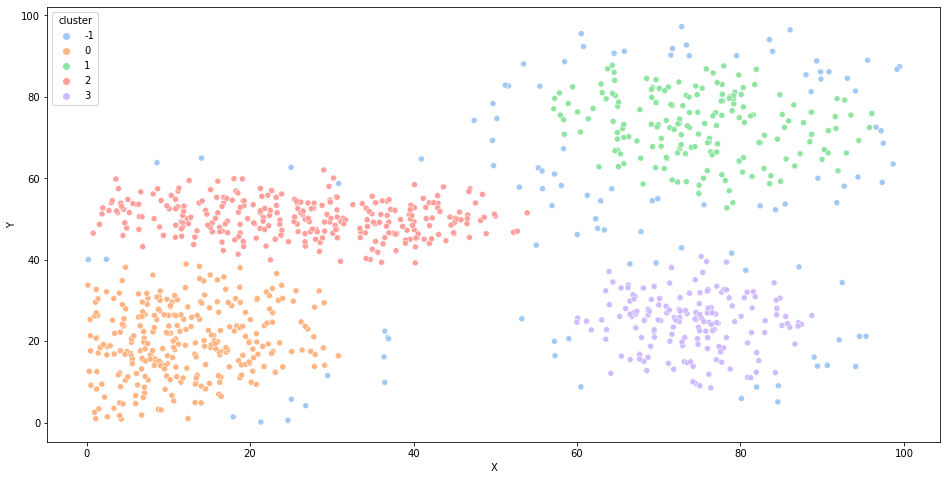

In [904]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='X', y='Y', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [905]:
f = open("output1.txt", "w+")
f.write("ClusterID = -1代表離群值    epsi=4.6, min_points=10, 離群值threshold=10")
f.write('\n\n')

for i in range(new_df.shape[0]):
    print(new_df.iloc[i][0]," ",new_df.iloc[i][1]," ","ClusterID = ",int(new_df.iloc[i][2]),file=f)
    
f.close()

# test the Clustering_test 2

In [906]:
data = pd.read_csv('./Clustering_test2', sep=' ', names=['X','Y'], header=None)
data.head()

,X,Y
0,44.347338,31.238228
1,50.600187,52.091475
2,70.710953,18.118381
3,62.951489,24.209507
4,75.496735,21.494209


In [907]:
model = DBSCAN(epsi=4.3, min_points=10)
points = model.fit(data)

x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

new_df = pd.DataFrame({
    'X': x,
    'Y': y,
    'cluster': cluster
})

new_df['cluster'].value_counts()

0      245
5      206
2      173
16      60
32      22
      ... 
100      1
101      1
102      1
103      1
268      1
Name: cluster, Length: 269, dtype: int64

In [908]:
for i in range(new_df['cluster'].value_counts().size):
    if new_df[new_df['cluster'] == i]['cluster'].count() <= 20:
        new_df.loc[(new_df['cluster'] == i),'cluster'] = -1
new_df['cluster'].value_counts()

-1     306
 0     245
 5     206
 2     173
 16     60
 20     22
 32     22
Name: cluster, dtype: int64

In [909]:
indexs = []
for i in new_df['cluster'].value_counts().index:
    indexs.append(int(i))
indexs.sort()
indexs

[-1, 0, 2, 5, 16, 20, 32]

In [910]:
indexs.remove(-1)
s = 0
for i in indexs:
    new_df.loc[(new_df['cluster'] == i),'cluster'] = s
    s += 1
new_df['cluster'].value_counts()

-1    306
 0    245
 2    206
 1    173
 3     60
 4     22
 5     22
Name: cluster, dtype: int64

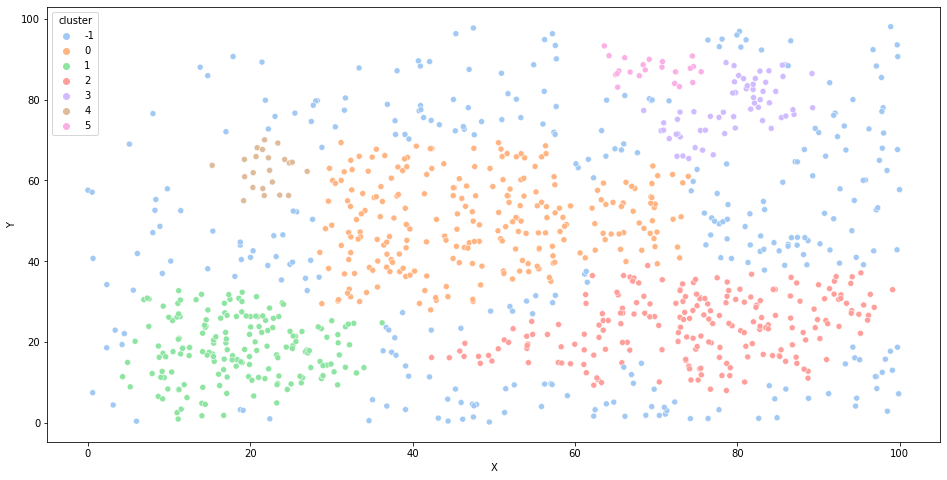

In [911]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='X', y='Y', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [912]:
f = open("output2.txt", "w+")
f.write("ClusterID = -1代表離群值    epsi=4.3, min_points=10, 離群值threshold=20")
f.write('\n\n')

for i in range(new_df.shape[0]):
    print(new_df.iloc[i][0]," ",new_df.iloc[i][1]," ","ClusterID = ",int(new_df.iloc[i][2]),file=f)
    
f.close()

# test the Clustering_test 3

In [913]:
data = pd.read_csv('./Clustering_test3', sep=' ', names=['X','Y'], header=None)
data.head()

,X,Y
0,90.017505,24.330255
1,58.922041,49.082894
2,37.782510,27.020460
3,39.362138,28.030907
4,44.085284,25.121901


In [920]:
model = DBSCAN(epsi=4, min_points=10)
points = model.fit(data)

x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

new_df = pd.DataFrame({
    'X': x,
    'Y': y,
    'cluster': cluster
})

new_df['cluster'].value_counts()

1      530
5      171
2      145
3       36
0       13
      ... 
87       1
88       1
89       1
90       1
240      1
Name: cluster, Length: 241, dtype: int64

In [921]:
for i in range(new_df['cluster'].value_counts().size):
    if new_df[new_df['cluster'] == i]['cluster'].count() <= 20:
        new_df.loc[(new_df['cluster'] == i),'cluster'] = -1
new_df['cluster'].value_counts()

 1    530
-1    278
 5    171
 2    145
 3     36
Name: cluster, dtype: int64

In [922]:
indexs = []
for i in new_df['cluster'].value_counts().index:
    indexs.append(int(i))
indexs.sort()
indexs

[-1, 1, 2, 3, 5]

In [923]:
indexs.remove(-1)
s = 0
for i in indexs:
    new_df.loc[(new_df['cluster'] == i),'cluster'] = s
    s += 1
new_df['cluster'].value_counts()

 0    530
-1    278
 3    171
 1    145
 2     36
Name: cluster, dtype: int64

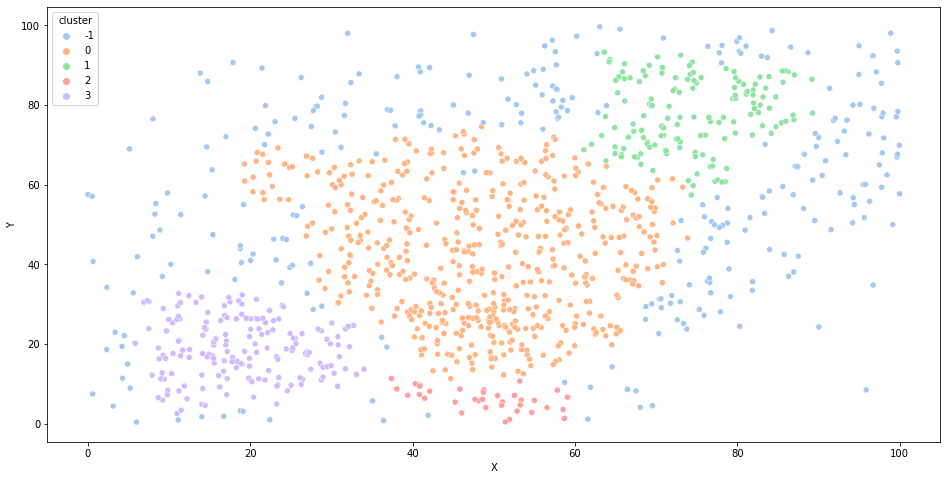

In [924]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='X', y='Y', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [925]:
f = open("output3.txt", "w+")
f.write("ClusterID = -1代表離群值    epsi=4, min_points=10, 離群值threshold=20")
f.write('\n\n')

for i in range(new_df.shape[0]):
    print(new_df.iloc[i][0]," ",new_df.iloc[i][1]," ","ClusterID = ",int(new_df.iloc[i][2]),file=f)
    
f.close()

# test the Clustering_test 4

In [944]:
data = pd.read_csv('./Clustering_test4', sep=' ', names=['X','Y'], header=None)
data.head()

,X,Y
0,32.944681,39.332077
1,40.897567,34.334723
2,36.752118,76.272075
3,36.040833,69.906300
4,26.952162,67.448793


In [945]:
model = DBSCAN(epsi=4, min_points=10)
points = model.fit(data)

x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

new_df = pd.DataFrame({
    'X': x,
    'Y': y,
    'cluster': cluster
})

new_df['cluster'].value_counts()

2     796
3      98
0       1
58      1
67      1
     ... 
30      1
29      1
28      1
27      1
90      1
Name: cluster, Length: 91, dtype: int64

In [946]:
for i in range(new_df['cluster'].value_counts().size):
    if new_df[new_df['cluster'] == i]['cluster'].count() <= 10:
        new_df.loc[(new_df['cluster'] == i),'cluster'] = -1
new_df['cluster'].value_counts()

 2    796
 3     98
-1     89
Name: cluster, dtype: int64

In [947]:
indexs = []
for i in new_df['cluster'].value_counts().index:
    indexs.append(int(i))
indexs.sort()
indexs

[-1, 2, 3]

In [948]:
indexs.remove(-1)
s = 0
for i in indexs:
    new_df.loc[(new_df['cluster'] == i),'cluster'] = s
    s += 1
new_df['cluster'].value_counts()

 0    796
 1     98
-1     89
Name: cluster, dtype: int64

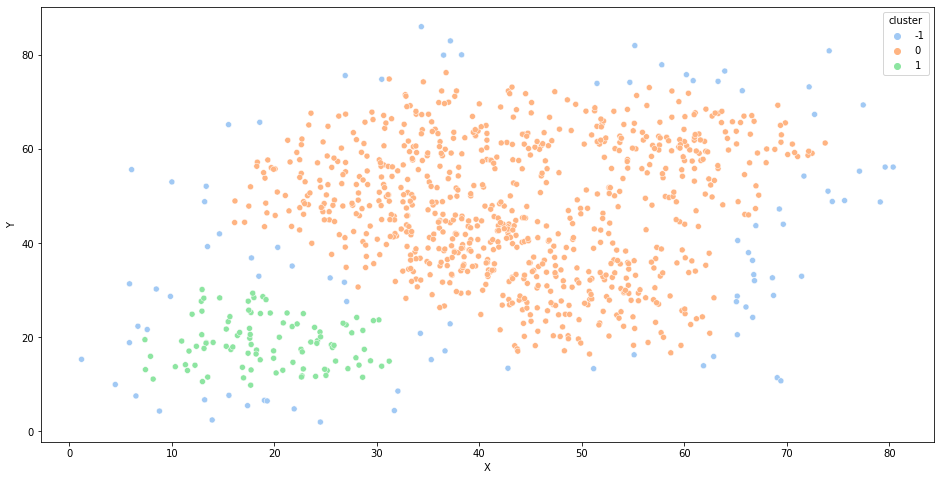

In [949]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='X', y='Y', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [950]:
f = open("output4.txt", "w+")
f.write("ClusterID = -1代表離群值    epsi=4, min_points=10, 離群值threshold=10")
f.write('\n\n')

for i in range(new_df.shape[0]):
    print(new_df.iloc[i][0]," ",new_df.iloc[i][1]," ","ClusterID = ",int(new_df.iloc[i][2]),file=f)
    
f.close()

# test the Clustering_test 5

In [951]:
data = pd.read_csv('./Clustering_test5', sep=' ', names=['X','Y'], header=None)
data.head()

,X,Y
0,31.199744,54.730493
1,19.532494,57.606522
2,29.279052,76.803431
3,35.752508,76.158598
4,34.610934,67.581895


In [952]:
model = DBSCAN(epsi=4, min_points=10)
points = model.fit(data)

x = []
y = []
cluster = []

for point in points:
    _x, _y = point.coordinate
    x.append(_x)
    y.append(_y)
    cluster.append(point.cluster_idx)

new_df = pd.DataFrame({
    'X': x,
    'Y': y,
    'cluster': cluster
})

new_df['cluster'].value_counts()

0      800
3       19
1       18
79       5
75       4
      ... 
59       1
60       1
61       1
62       1
173      1
Name: cluster, Length: 174, dtype: int64

In [953]:
for i in range(new_df['cluster'].value_counts().size):
    if new_df[new_df['cluster'] == i]['cluster'].count() <= 10:
        new_df.loc[(new_df['cluster'] == i),'cluster'] = -1
new_df['cluster'].value_counts()

 0    800
-1    178
 3     19
 1     18
Name: cluster, dtype: int64

In [954]:
indexs = []
for i in new_df['cluster'].value_counts().index:
    indexs.append(int(i))
indexs.sort()
indexs

[-1, 0, 1, 3]

In [955]:
indexs.remove(-1)
s = 0
for i in indexs:
    new_df.loc[(new_df['cluster'] == i),'cluster'] = s
    s += 1
new_df['cluster'].value_counts()

 0    800
-1    178
 2     19
 1     18
Name: cluster, dtype: int64

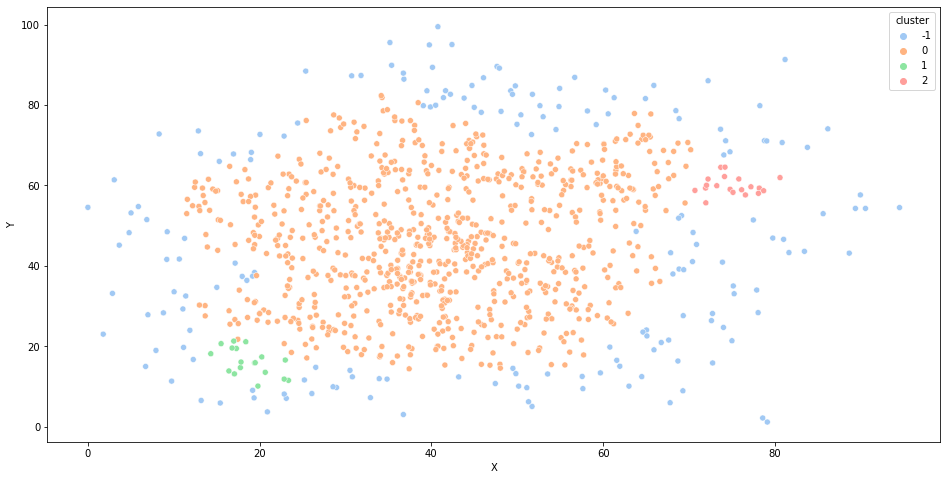

In [956]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=new_df, x='X', y='Y', hue='cluster', palette='pastel', ax=ax)
plt.show()

In [957]:
f = open("output5.txt", "w+")
f.write("ClusterID = -1代表離群值    epsi=4, min_points=10, 離群值threshold=10")
f.write('\n\n')

for i in range(new_df.shape[0]):
    print(new_df.iloc[i][0]," ",new_df.iloc[i][1]," ","ClusterID = ",int(new_df.iloc[i][2]),file=f)
    
f.close()